In [523]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mlxtend.frequent_patterns 
import mlxtend.preprocessing

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [524]:
my_fyle = "/data/groceries - groceries.csv"
data = pd.read_csv(str(os.getcwd())+ my_fyle).drop(	columns="Item(s)")
data = data.astype(object).replace(np.nan, None)


In [573]:
data_list = []
for i in range(len(data)):
    data_list.append(list(filter(None, data.values[i])))
data_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [526]:
encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(data_list)

encode_arr

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [527]:
encode_.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [528]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [529]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


In [530]:
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.3,support_only=False)

rules = rules[rules["lift"] > 2].reset_index(drop =True)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
1,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807
2,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521
3,(cream cheese),(yogurt),0.039654,0.139502,0.012405,0.312821,2.242412,0.006873,1.252218
4,(curd),(yogurt),0.053279,0.139502,0.017285,0.324427,2.325615,0.009853,1.273732


In [531]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [532]:
confidence_table = rules[["antecedents","consequents", "confidence"]]
confidence_table

,antecedents,consequents,confidence
0,beef,root vegetables,0.331395
1,berries,yogurt,0.318043
2,chicken,other vegetables,0.417062
3,cream cheese,yogurt,0.312821
4,curd,yogurt,0.324427
5,hamburger meat,other vegetables,0.415902
6,onions,other vegetables,0.459016
7,root vegetables,other vegetables,0.434701
8,whipped/sour cream,other vegetables,0.402837
9,butter,other vegetables,0.416974


In [533]:
G=nx.from_pandas_edgelist(confidence_table, 'antecedents', 'consequents')
sizes = (confidence_table['confidence'].values*100).astype(np.float)

In [534]:
l1 = []

for i in G.nodes:
    if confidence_table[confidence_table["antecedents"] == i].empty:
        l1.append([0])
    else:
        l1.append(confidence_table[confidence_table["antecedents"] == i]["confidence"].values.tolist())

l2 = []

for i in G.nodes:
    if confidence_table[confidence_table["consequents"] == i].empty:
        l2.append([0])
    else:
        l2.append(confidence_table[confidence_table["consequents"] == i]["confidence"].values.tolist())

In [535]:
l3 = []
for i in range(len(l1)):
    l3.append(l1[i] +l2[i]) 
    l3[i] = sum(l3[i])*5000

In [571]:
color = pd.DataFrame(range(len(confidence_table)), columns=["colors"])
color  = color.assign(colors =lambda x: (100 - (confidence_table["confidence"]*100)) )
#color["colors"]  = color["colors"].astype(int)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rgb = scaler.fit_transform(color)
color["colors"] = rgb
for i in range(0,3):
    color["colors" + str(i)] = color.loc[:, 'colors']

color =  color.assign(colors0 =lambda x: abs(( .06 -(confidence_table["confidence"]))) )
color =  color.assign(colors1 =lambda x: abs(( .04 -(confidence_table["confidence"]))) )
color

,colors,colors0,colors1,colors2
0,0.921813,0.271395,0.291395,0.921813
1,0.970118,0.258043,0.278043,0.970118
2,0.611905,0.357062,0.377062,0.611905
3,0.989010,0.252821,0.272821,0.989010
4,0.947020,0.264427,0.284427,0.947020
5,0.616099,0.355902,0.375902,0.616099
6,0.460128,0.399016,0.419016,0.460128
7,0.548090,0.374701,0.394701,0.548090
8,0.663364,0.342837,0.362837,0.663364
9,0.612221,0.356974,0.376974,0.612221


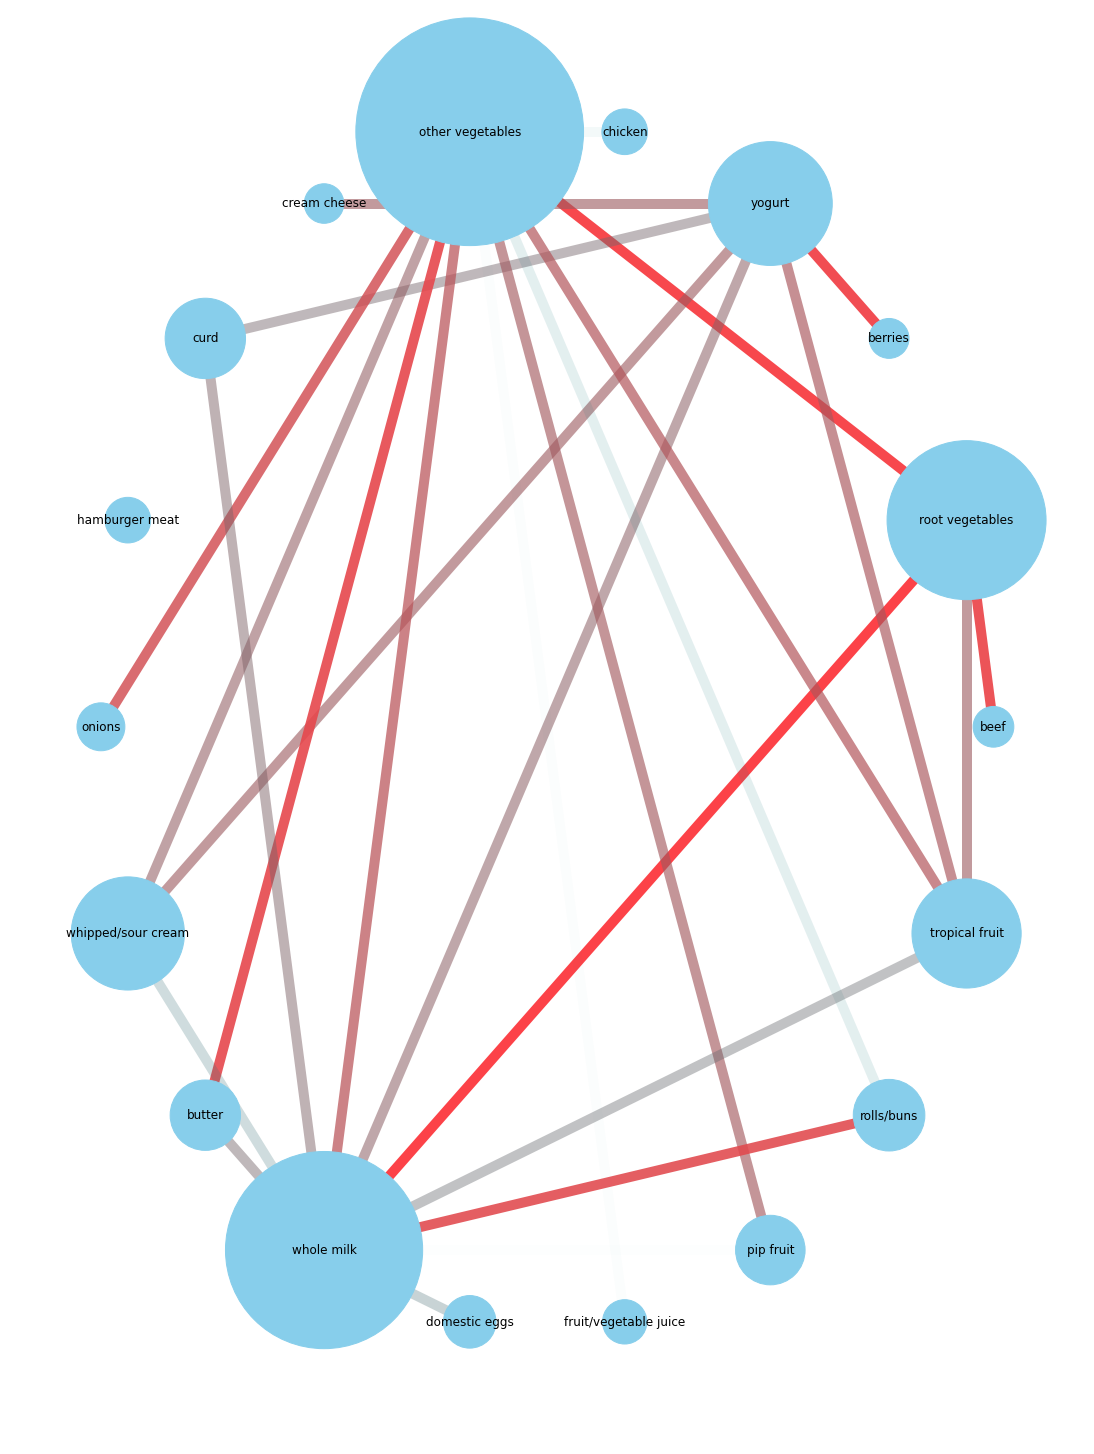

In [572]:
plt.figure(figsize=(15,20))
nx.draw(G, with_labels=True, node_color='skyblue',node_size=l3,width=10,edge_color = color.values, edge_cmap=plt.cm.Blues,pos=nx.circular_layout(G))
plt.show()